<a href="https://colab.research.google.com/github/Rishthegod/Advanced-Stock-Prediction-with-Backtesting/blob/main/Advanced_Stock_Prediction_with_backtesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf

In [2]:
sp500 = yf.Ticker("^GSPC") #set the variable equal to a single ticker, may change it to user input later

In [3]:
sp500 = sp500.history(period="max")

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-06-20 00:00:00-04:00,4396.109863,4400.149902,4367.189941,4388.709961,4055790000,0.0,0.0
2023-06-21 00:00:00-04:00,4380.009766,4386.220215,4360.140137,4365.689941,3709330000,0.0,0.0
2023-06-22 00:00:00-04:00,4355.399902,4382.250000,4351.819824,4381.890137,3511000000,0.0,0.0


In [5]:
sp500.index #index is the leftmost column of a dataset, how things are organized: here it is by date


DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-06-12 00:00:00-04:00', '2023-06-13 00:00:00-04:00',
               '2023-06-14 00:00:00-04:00', '2023-06-15 00:00:00-04:00',
               '2023-06-16 00:00:00-04:00', '2023-06-20 00:00:00-04:00',
               '2023-06-21 00:00:00-04:00', '2023-06-22 00:00:00-04:00',
               '2023-06-23 00:00:00-04:00', '2023-06-26 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=23985, freq=None)

<Axes: xlabel='Date'>

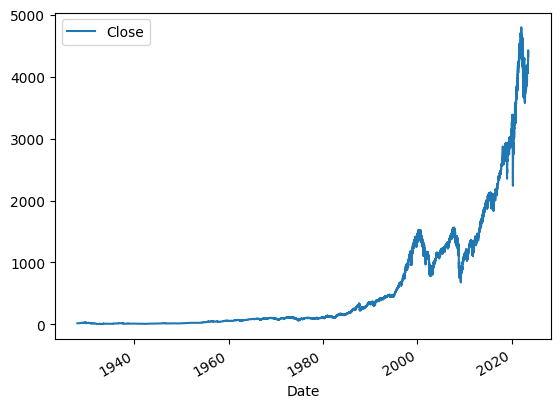

In [6]:
sp500.plot.line(y="Close", use_index=True)

In [7]:
del sp500["Dividends"] #delete the unecessary dividends and stock splits columns in our data for sp500
del sp500["Stock Splits"]

#our target for this model is to predict whether the stock will move up or down, not trying to predict absolute (close) price for next day. Trying to predict absolute price is a common pitfall and is not our main concern as we want to know if we buy the stock right now will we turn a profit or a loss tommorow?

In [8]:
sp500["Tommorow"] = sp500["Close"].shift(-1) #add a new column called tommorow which is basically the next day's close price

In [9]:
sp500

,Open,High,Low,Close,Volume,Tommorow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-06-20 00:00:00-04:00,4396.109863,4400.149902,4367.189941,4388.709961,4055790000,4365.689941
2023-06-21 00:00:00-04:00,4380.009766,4386.220215,4360.140137,4365.689941,3709330000,4381.890137
2023-06-22 00:00:00-04:00,4355.399902,4382.250000,4351.819824,4381.890137,3511000000,4348.330078


In [10]:
sp500["Target"] = (sp500["Tommorow"]> sp500["Close"]).astype(int) #add a new cloumn: target which returns a boolean True ( 1 or 0) if tommorows price at close is larger than today's price at close

In [11]:
sp500

,Open,High,Low,Close,Volume,Tommorow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-06-20 00:00:00-04:00,4396.109863,4400.149902,4367.189941,4388.709961,4055790000,4365.689941,0
2023-06-21 00:00:00-04:00,4380.009766,4386.220215,4360.140137,4365.689941,3709330000,4381.890137,1
2023-06-22 00:00:00-04:00,4355.399902,4382.250000,4351.819824,4381.890137,3511000000,4348.330078,0


In [12]:
sp500 = sp500.loc["1990-01-01":].copy() #only take dates after 1990 can change this to an input later start date for model .copy() command helps us avoid pandas subset error later on possibly

In [13]:
sp500

,Open,High,Low,Close,Volume,Tommorow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-06-20 00:00:00-04:00,4396.109863,4400.149902,4367.189941,4388.709961,4055790000,4365.689941,0
2023-06-21 00:00:00-04:00,4380.009766,4386.220215,4360.140137,4365.689941,3709330000,4381.890137,1
2023-06-22 00:00:00-04:00,4355.399902,4382.250000,4351.819824,4381.890137,3511000000,4348.330078,0


In [14]:
from sklearn.ensemble import RandomForestClassifier

Random forest model: random forest works by training individual decision trees with randomized parameters then averaging those decision trees resistant to overfit, and run quickly and pick up nonlinear tendencies (if price is higher does not also mean target must be higher: nonlinear) most stock market correlations are nonlinear. Almost impossible to find a linear relationship in stocks.

In [15]:
model = RandomForestClassifier(n_estimators=100,min_samples_split=100, random_state=1)

#n_estimators is num of decision trees: higher vals= more accurate but longer runtime. Min_sample_split protects against overfitting: higher vals = lower accuracy, random state =1 : 1 here is the seed to generate the random #s for the random forest off of so that if we run the same program twice we get the same "random nums"

In [16]:
train = sp500.iloc[:-100] #cannot use cross validation as in real world you will not have future data to train historical model
test = sp500.iloc[-100:] #split the data into training and test sets. All but last 100 rows are training and last 100 is test set change to 0.8 like used in other model

predictors = ["Close", "Volume","Open","High","Low"] #estabilish which cloumns we are using for making predictions: making sure to not include the tommorow or target columns so the model doesn't know the future
model.fit(train[predictors],train["Target"]) #this command "fits" the model, here we are using the predictors array columns in order to predict the "Target" Column

RandomForestClassifier(min_samples_split=100, random_state=1)

In [17]:
from sklearn.metrics import precision_score #import something to check the precision of of forecasts
preds = model.predict(test[predictors]) #array to hold our predictions
preds

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0])

In [18]:
import pandas as pd

preds = pd.Series(preds, index=test.index) #change hard to work with numPy array into a pandas dataseries array

preds

Date
2023-02-01 00:00:00-05:00    0
2023-02-02 00:00:00-05:00    0
2023-02-03 00:00:00-05:00    1
2023-02-06 00:00:00-05:00    0
2023-02-07 00:00:00-05:00    0
                            ..
2023-06-20 00:00:00-04:00    1
2023-06-21 00:00:00-04:00    1
2023-06-22 00:00:00-04:00    1
2023-06-23 00:00:00-04:00    0
2023-06-26 00:00:00-04:00    0
Length: 100, dtype: int64

In [19]:
precision_score(test["Target"], preds) #here we can see our model onyl predicted correctly 64% of the time

0.6

In [20]:
combined = pd.concat([test["Target"], preds], axis =1) # axis =1 means treat each input as its own column. Concatenate the predictions and actual values to able to see them visually on a graph how accurate we were

<Axes: xlabel='Date'>

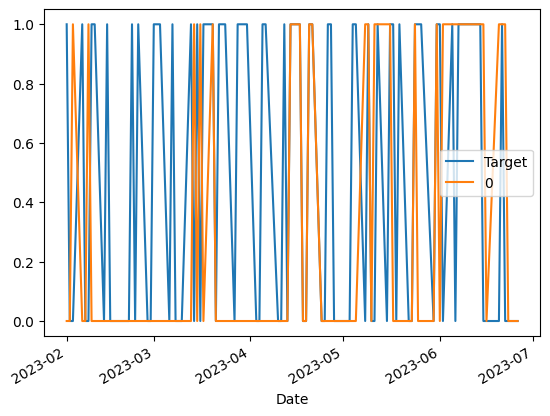

In [21]:
combined.plot() #orange is our predictions blue is what actually happened: whether the market actually went up or down

In [22]:
def predict(train, test, predictors, model): #define a predict function that does all that has been done so far into one function
  model.fit(train[predictors], train["Target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index=test.index, name = "Predictions")
  combined = pd.concat([test["Target"], preds], axis =1)
  return combined


In [23]:
def backtest(data, model, predictors, start = 2500, step = 250):
  all_predictions = []

  for i in range(start, data.shape[0], step): #this for loop will loop through the data starting after the intitial 2500 days year by year (250 days)
    train = data.iloc[0:i].copy() #split the data into test and training sets, using the .copy() again to avoid error
    test = data.iloc[i:(i+step)].copy() #here you can see the train and test set changes with the training set expanding to include the precious step
    predictions = predict(train, test, predictors, model) #call the predict function above
    all_predictions.append(predictions) #save predictions
  return pd.concat(all_predictions) #return array of all predictions


#each year has 250 trading days, so this is taking 10 years of data and training the model. Then it takes the next 250 days and to predict the next year, then repeats the process. for example it trains from 2000-2010 then uses that data to train 2011. Then it uses 2000-2011 to predict 2012, then 2000-2012 to predict 2013. the first years (2500) days will not be predicted by the model but used solely as a training set. it will start from the 11th year predictions.

In [24]:
predictions = backtest(sp500, model, predictors) #backtest our model

In [25]:
predictions["Predictions"].value_counts() #call the predictions (preds array) and see how many times we predicted up or down

0    3433
1    2502
Name: Predictions, dtype: int64

In [26]:
precision_score(predictions["Target"],predictions["Predictions"]) #prediction precision with backtesting model ( unfortunately our precision actually went down :(  )

0.5291766586730615

In [27]:
predictions["Target"].value_counts() / predictions.shape[0] #actual percentage of times the market went up or down, better than our model.

1    0.533783
0    0.466217
Name: Target, dtype: float64

In [28]:
horizons = [2,5,60,250,1000] # we are now going to get rolling averages for the close price for these horizons: last 2 days, 5days...1000days. Then compare the close price of today to these averages to make predictions such as if the market has gone down alot, it may be due for a correction to the upside.

In [29]:
new_predictors = []

for horizon in horizons:
  rolling_averages = sp500.rolling(horizon).mean() #compute the rolling average of any column based on the last (horizon) number of terms

  ratio_column = f"Close_Ratio_{horizon}" #add in a new column
  sp500[ratio_column] =sp500["Close"] / rolling_averages["Close"] #compute the ratio between the current close and the rolloing average

  trend_column = f"Trend_{horizon}" #create a new column trend column for storing the trend of uptrun or downturn
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"] #compute the sum of the targets up to the last (horizon) number of values. The shift is shifting one row forward
  new_predictors += [ratio_column, trend_column] #add these column to the new predictors array


In [30]:
sp500

,Open,High,Low,Close,Volume,Tommorow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-20 00:00:00-04:00,4396.109863,4400.149902,4367.189941,4388.709961,4055790000,4365.689941,0,0.997627,0.0,0.998990,3.0,1.053891,34.0,1.099416,118.0,1.161007,535.0
2023-06-21 00:00:00-04:00,4380.009766,4386.220215,4360.140137,4365.689941,3709330000,4381.890137,1,0.997370,0.0,0.993900,2.0,1.046710,33.0,1.092986,118.0,1.154489,534.0
2023-06-22 00:00:00-04:00,4355.399902,4382.250000,4351.819824,4381.890137,3511000000,4348.330078,0,1.001852,1.0,0.997166,2.0,1.048899,33.0,1.096398,118.0,1.158342,534.0


In [31]:
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"]) #drop the columns which are NaN as our model needs 4 years of dat for the 1000 day horizon to compute values. However do not drop tommorow's column to make predictions for tommorow.

In [32]:
model = RandomForestClassifier(n_estimators =200, min_samples_split =50, random_state=1) #rerun model with more random trees and less min sample split

In [33]:
def predict(train, test, predictors, model): #define a predict function that does all that has been done so far into one function
  model.fit(train[predictors], train["Target"])
  preds = model.predict_proba(test[predictors])[:,1] #rewrite predict function slightly using the predict_proba function that now returns the probability of the target being 0 or 1 rather than returning just a 0 or 1. But using the [:,1] we return only the porbablility that the stock will go up.
  preds[preds >= 0.6] =1 #setting the threshold for predicting it will go up from being 50% confidence to at least 60% confident it will go up to return a 1
  preds[preds < 0.6] = 0 #similarly if the model is not at least 60% the price will go up return 0 so to be safe.
  preds = pd.Series(preds, index=test.index, name = "Predictions")
  combined = pd.concat([test["Target"], preds], axis =1)
  return combined


In [34]:
predictions =backtest(sp500,model,new_predictors) #now we use only the new_predictors (the rolling averages and the trends) into consideration when training our model as the open/close/high/low are absolute values and are not useful in creating a pattern to follow (they are just numbers to the model, they do not tell us anything to predict off of)

In [35]:
predictions["Predictions"].value_counts() #now we see it tell us that stock will go up much less than before, as it needs to be more confident.

0.0    4119
1.0     815
Name: Predictions, dtype: int64

In [36]:
precision_score(predictions["Target"], predictions["Predictions"]) #precision score of our model

0.5680981595092025

In [37]:
predictions["Target"].value_counts() / predictions.shape[0] #actual percentage it went up or down, as seen our model is slightly better

1    0.543778
0    0.456222
Name: Target, dtype: float64

In [38]:
predictions["Target"].value_counts() #actual # of times it went up or down

1    2683
0    2251
Name: Target, dtype: int64

In [39]:
predictions

,Target,Predictions
Date,,
2003-11-14 00:00:00-05:00,0,0.0
2003-11-17 00:00:00-05:00,0,1.0
2003-11-18 00:00:00-05:00,1,1.0
2003-11-19 00:00:00-05:00,0,0.0
2003-11-20 00:00:00-05:00,1,1.0
...,...,...
2023-06-16 00:00:00-04:00,0,0.0
2023-06-20 00:00:00-04:00,0,0.0
2023-06-21 00:00:00-04:00,1,0.0
